# Testing confidence intervals
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import poisson

### (1) Definition of probability intervals for assumed probability density function

Assuming Poisson probability distribution with background (!)

In [2]:
# Return value of n corresponsing to upper (one-side) limit on given CL
# Use 1-CL for lower limit
# Fixed background level

bg = 3.0

def problim(mean,cl):
    
# Use inverse survival function from scipy (inverse of 1 - cumulative distribution)

    xlim = poisson.isf(1-cl,bg+mean)

    return xlim 

# Help function to check coverage

def probsum(mean,n1,n2):
    nn = np.linspace(n1,n2,int(n2-n1+1.5))
    pn=poisson.pmf(nn,bg+mean)
    return np.sum(pn)


### (2) Define set of hypothesis

In [3]:
# Considered values of true mean

# vmean = np.linspace(0.5,15.,30)
# vmean = np.linspace(0.1,15.,150)
vmean = np.linspace(0.02,15.,750)

CL = 0.95            # One sided! So the inteval will be 90% CL

# Upper an lower edges of x probability intervals

vhig = problim(vmean,CL)
vlow = problim(vmean,1-CL)


### (3)  Print interval information

In [4]:
print("\nProbability intervals for x:")

print("\n  true mean     n_low     n_high    CL_low      CL_high     CL")

for im in range(vmean.size) :
    lcl = 1 - probsum(vmean[im],0,vlow[im]-1)
    hcl = probsum(vmean[im],0,vhig[im])
    tcl = probsum(vmean[im],vlow[im],vhig[im])
    
# For test
# hcl = 1 - probsum(vmean[im],0,vlow[im])
# lcl = probsum(vmean[im],0,vhig[im]-1)

    print ("%10.3f   %8.3f  %8.3f     %8.6f    %8.6f     %8.6f" % (vmean[im],vlow[im],vhig[im],lcl,hcl,tcl))



Probability intervals for x:

  true mean     n_low     n_high    CL_low      CL_high     CL
     0.020      1.000     6.000     0.951199    0.965473     0.916672
     0.040      1.000     6.000     0.952165    0.964435     0.916600
     0.060      1.000     6.000     0.953112    0.963376     0.916488
     0.080      1.000     6.000     0.954041    0.962296     0.916337
     0.100      1.000     6.000     0.954951    0.961196     0.916147
     0.120      1.000     6.000     0.955843    0.960075     0.915918
     0.140      1.000     6.000     0.956717    0.958933     0.915650
     0.160      1.000     6.000     0.957574    0.957770     0.915344
     0.180      1.000     6.000     0.958414    0.956586     0.915000
     0.200      1.000     6.000     0.959238    0.955381     0.914619
     0.220      1.000     6.000     0.960045    0.954154     0.914199
     0.240      1.000     6.000     0.960836    0.952907     0.913743
     0.260      1.000     6.000     0.961612    0.951637     0.913

### (4) Draw probability intervals

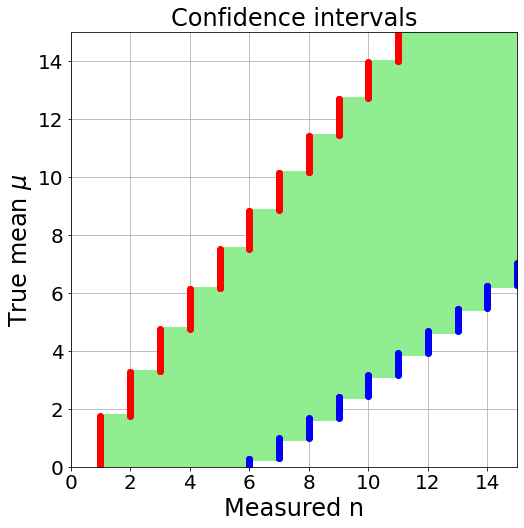

In [9]:
# Frame range

Xmin=0
Xmax=15
Ymin=0
Ymax=15

plt.figure(figsize=(8, 8))

# Intervals

plt.hlines(vmean,vlow,vhig,color='lightgreen',linewidth=5)

# Limits 

plt.plot(vlow,vmean,'o',color='red')
plt.plot(vhig,vmean,'o',color='blue')


plt.title("Confidence intervals",size=24)
plt.xlabel("Measured n",size=24)
plt.ylabel("True mean $\mu$",size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([Xmin,Xmax])
plt.ylim([Ymin,Ymax])
plt.grid(which='major', axis='both')

fname = '07_poisson_interval2_1.png'
plt.savefig(fname)


### (5) Hypothetical measurement

In [10]:
Xm = 6

# Look for limit point in the probability interval tables

iuh = np.argmax(Xm <= vhig)
iul = np.argmax(Xm < vlow)

ul=vmean[iul-1]
print('Upper limit : %.4f' % (ul))

ll = vmean[iuh]
print('Lower limit : %.4f' % (ll))

Upper limit : 8.8400
Lower limit : 0.0200


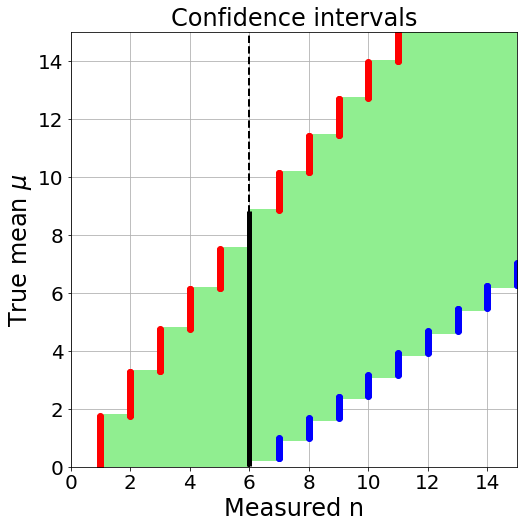

In [11]:
# Frame range

Xmin=0
Xmax=15
Ymin=0
Ymax=15

plt.figure(figsize=(8, 8))

# Intervals

plt.hlines(vmean,vlow,vhig,color='lightgreen',linewidth=5)

# Limits 

plt.plot(vlow[vlow!=Xm],vmean[vlow!=Xm],'o',color='red')
plt.plot(vhig[vhig!=Xm],vmean[vhig!=Xm],'o',color='blue')

plt.vlines(Xm,Ymin,Ymax,color='black',linewidth=2,linestyles='dashed')
plt.vlines(Xm,ll,ul,color='black',linewidth=5,linestyles='solid')

plt.title("Confidence intervals",size=24)
plt.xlabel("Measured n",size=24)
plt.ylabel("True mean $\mu$",size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([Xmin,Xmax])
plt.ylim([Ymin,Ymax])
plt.grid(which='major', axis='both')

fname = '07_poisson_interval2_2.png'
plt.savefig(fname)
